# Syed Muhammad Zain Computer Vision Deep Learning Model


## Importing libraries

In [3]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import *
from keras.utils import np_utils
from keras.optimizers import Adam
from tqdm import tqdm
import seaborn as sns
import numpy as np
import numpy as np
import pandas as pd
import os
from keras.layers import (Dropout, Input, Dense, Conv2D, 
                          MaxPooling2D, GlobalAveragePooling2D, 
                          UpSampling2D, Conv2DTranspose, 
                          Reshape, Flatten, Activation, 
                          BatchNormalization)
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.layers.advanced_activations import LeakyReLU
from keras.initializers import RandomNormal

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

In [5]:
Train_data1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-train.csv', header=None)

In [6]:
Train_data1.shape

(112800, 785)

In [7]:
#splitting data into xtrain and ytrain
trainingy=Train_data1[[0]]
trainingx=Train_data1.drop([0],axis=1)
print(trainingy.shape)
print(trainingx.shape)

(112800, 1)
(112800, 784)


In [8]:
#converting to series
trainingy=Train_data1[0]
trainingy.shape

(112800,)

In [9]:
mapping=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
mapping.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [10]:
mappingdict = {}
for i,L in enumerate(mapping):
    mappingdict[i] = chr(L)

mappingdict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [11]:
def correctingimage(imageforcorrection):
    imageforcorrection = imageforcorrection.reshape(28, 28)
    imageforcorrection = np.fliplr(imageforcorrection)
    imageforcorrection = np.rot90(imageforcorrection)
    return imageforcorrection

In [12]:
trainingx = np.apply_along_axis(correctingimage, 1, trainingx)
trainingx.shape

(112800, 28, 28)

In [13]:
#normalizing x and one hot encoding y both are not dataframes
def preprocess(x):    
    x = x.reshape(-1, 28, 28, 1) #-1 means number of examples are undefined/unknown
    x = np.float64(x)
    x = (x / 255 - 0.5) * 2
    x = np.clip(x, -1, 1)
    return x

In [14]:
trainingx=preprocess(trainingx)

In [15]:
print(trainingx.max(),trainingx.min())

1.0 -1.0


In [16]:
gopt = Adam(0.0001, 0.5)
dopt = Adam(0.0002, 0.5)
ND = 100


## Training and testing

In [17]:
def Gena():

    convmodel = Sequential()

    convmodel.add(Dense(512, input_dim=ND))
    convmodel.add(BatchNormalization(momentum=0.8))
    convmodel.add(Activation("relu"))
    
    convmodel.add(Dense(7350, input_dim=ND))
    convmodel.add(BatchNormalization(momentum=0.8))
    convmodel.add(Activation("relu"))
    
    convmodel.add(Reshape((7, 7, 150)))
    
    convmodel.add(UpSampling2D((2, 2)))
    convmodel.add(Conv2D(64, (2, 2), padding='same', 
                     kernel_initializer=RandomNormal(0, 0.02)))
    convmodel.add(BatchNormalization(momentum=0.8))
    convmodel.add(LeakyReLU(0.2))
    convmodel.add(UpSampling2D((2, 2)))
   
    convmodel.add(Conv2D(1, (3, 3), padding='same', activation = "tanh", 
                     kernel_initializer=RandomNormal(0, 0.02)))
    
    return convmodel

In [18]:
def Disc():
    convmodel = Sequential()
    
    convmodel.add(Conv2D(64, (2, 2), strides=2, padding='same', 
                     kernel_initializer=RandomNormal(0, 0.02), 
                     input_shape=(28, 28, 1)))
    convmodel.add(LeakyReLU(0.2))
    
    convmodel.add(Conv2D(128, (2, 2), strides=2, 
                     kernel_initializer=RandomNormal(0, 0.02)))
    convmodel.add(LeakyReLU(0.2))
    
    convmodel.add(Flatten())
    
    
    convmodel.add(Dense(128))
    convmodel.add(LeakyReLU(0.2))
    
    convmodel.add(Dropout(0.5))
    convmodel.add(Dense(1, activation='sigmoid'))
    
    convmodel.compile(loss='binary_crossentropy', optimizer=dopt)
    return convmodel

In [19]:
G = Gena()
G.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               51712     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7350)              3770550   
_________________________________________________________________
batch_normalization_1 (Batch (None, 7350)              29400     
_________________________________________________________________
activation_1 (Activation)    (None, 7350)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 150)         0

In [20]:
D= Disc()
D.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 64)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         32896     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 128)              

In [21]:
noisegenerated = Input(shape=(ND,))
fake_data_generated = G(noisegenerated )
D.trainable = False
OUTPUT1 = D(fake_data_generated)
DCGAN=Model(noisegenerated , OUTPUT1)
DCGAN.compile(loss='binary_crossentropy', optimizer=gopt)
 





In [22]:
FN= np.random.normal(0, 1, size=(30, ND))


In [23]:
def show_results(title, epoch):
    imgs = G.predict(FN)
    imgs = 0.5 * imgs + 0.5
    plt.figure(figsize=(11,11))
    
    i = 1
    for img in imgs:
        plt.subplot(10, 10, i)
        plt.imshow(img.reshape((28,28)), cmap='gray')
        plt.axis('off')
        i+=1
    plt.suptitle(title, fontsize = 15)
    plt.savefig(str(epoch)+".png", transparent=True)
    plt.show()

In [24]:
epochs = 51
batch_size = 256
steps_per_epoch = len(trainingx)//batch_size

current epouch is:  0
discriminator loss currently is :  0.676733136177063
generator loss currently is:  0.8471922278404236
--------------------------------------------------------------------------------


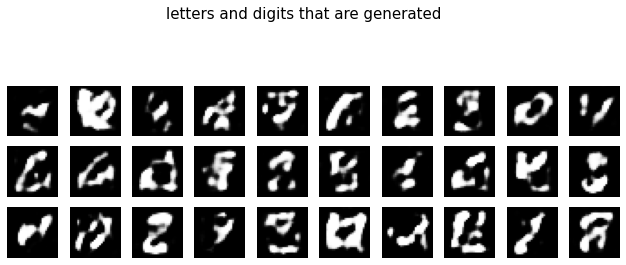

current epouch is:  1
discriminator loss currently is :  0.6464579105377197
generator loss currently is:  0.6408425569534302
--------------------------------------------------------------------------------
current epouch is:  2
discriminator loss currently is :  0.6653921604156494
generator loss currently is:  0.6784420013427734
--------------------------------------------------------------------------------
current epouch is:  3
discriminator loss currently is :  0.6758405566215515
generator loss currently is:  0.700741171836853
--------------------------------------------------------------------------------
current epouch is:  4
discriminator loss currently is :  0.6778978109359741
generator loss currently is:  0.7096163034439087
--------------------------------------------------------------------------------
current epouch is:  5
discriminator loss currently is :  0.6558714509010315
generator loss currently is:  0.8980101943016052
----------------------------------------------------

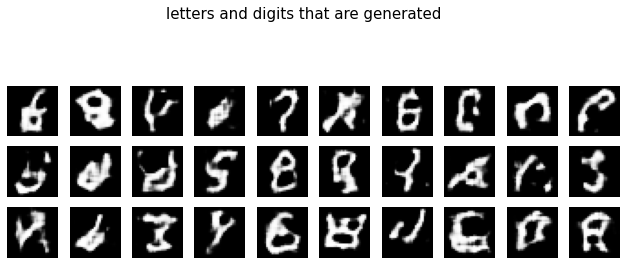

current epouch is:  6
discriminator loss currently is :  0.7229525446891785
generator loss currently is:  0.4783777892589569
--------------------------------------------------------------------------------
current epouch is:  7
discriminator loss currently is :  0.625920295715332
generator loss currently is:  0.8352823853492737
--------------------------------------------------------------------------------
current epouch is:  8
discriminator loss currently is :  0.628032386302948
generator loss currently is:  1.2776182889938354
--------------------------------------------------------------------------------
current epouch is:  9
discriminator loss currently is :  0.6013773679733276
generator loss currently is:  0.8763787746429443
--------------------------------------------------------------------------------
current epouch is:  10
discriminator loss currently is :  0.6050114035606384
generator loss currently is:  0.7207745909690857
----------------------------------------------------

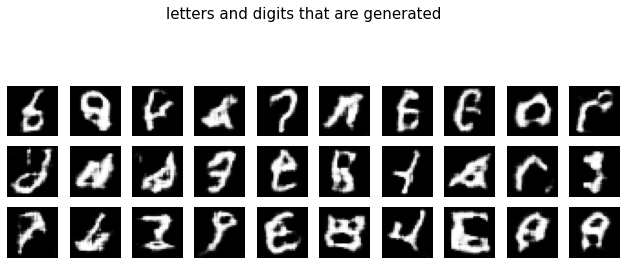

current epouch is:  11
discriminator loss currently is :  0.584747850894928
generator loss currently is:  0.9334620237350464
--------------------------------------------------------------------------------
current epouch is:  12
discriminator loss currently is :  0.5992042422294617
generator loss currently is:  0.7642587423324585
--------------------------------------------------------------------------------
current epouch is:  13
discriminator loss currently is :  0.6113914251327515
generator loss currently is:  0.8256032466888428
--------------------------------------------------------------------------------
current epouch is:  14
discriminator loss currently is :  0.5821396112442017
generator loss currently is:  0.925085723400116
--------------------------------------------------------------------------------
current epouch is:  15
discriminator loss currently is :  0.5880171060562134
generator loss currently is:  0.905989408493042
-------------------------------------------------

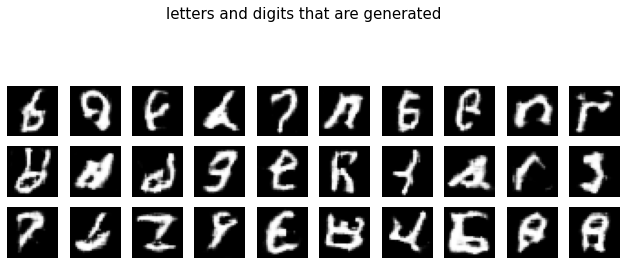

current epouch is:  16
discriminator loss currently is :  0.602039098739624
generator loss currently is:  0.9137556552886963
--------------------------------------------------------------------------------
current epouch is:  17
discriminator loss currently is :  0.6326848864555359
generator loss currently is:  0.553503155708313
--------------------------------------------------------------------------------
current epouch is:  18
discriminator loss currently is :  0.6097873449325562
generator loss currently is:  0.9680730700492859
--------------------------------------------------------------------------------
current epouch is:  19
discriminator loss currently is :  0.6096322536468506
generator loss currently is:  0.9748721122741699
--------------------------------------------------------------------------------
current epouch is:  20
discriminator loss currently is :  0.6291696429252625
generator loss currently is:  1.274155855178833
-------------------------------------------------

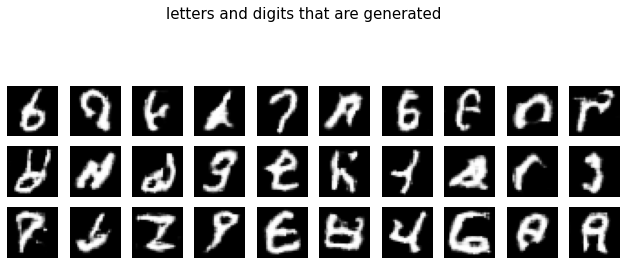

current epouch is:  21
discriminator loss currently is :  0.5992991924285889
generator loss currently is:  0.9259034991264343
--------------------------------------------------------------------------------
current epouch is:  22
discriminator loss currently is :  0.6179375052452087
generator loss currently is:  0.9533520936965942
--------------------------------------------------------------------------------
current epouch is:  23
discriminator loss currently is :  0.6405801773071289
generator loss currently is:  1.2544442415237427
--------------------------------------------------------------------------------
current epouch is:  24
discriminator loss currently is :  0.604179859161377
generator loss currently is:  1.0269654989242554
--------------------------------------------------------------------------------
current epouch is:  25
discriminator loss currently is :  0.5981714725494385
generator loss currently is:  1.072651982307434
------------------------------------------------

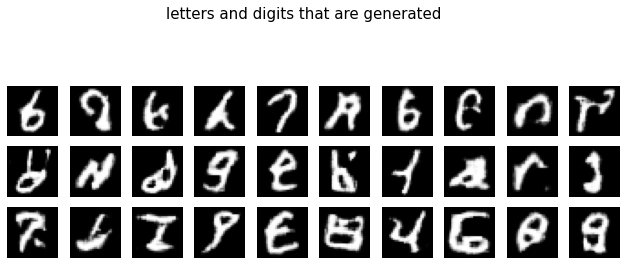

current epouch is:  26
discriminator loss currently is :  0.6067894697189331
generator loss currently is:  0.7372620105743408
--------------------------------------------------------------------------------
current epouch is:  27
discriminator loss currently is :  0.6725618243217468
generator loss currently is:  0.5911606550216675
--------------------------------------------------------------------------------
current epouch is:  28
discriminator loss currently is :  0.6040985584259033
generator loss currently is:  0.7510876655578613
--------------------------------------------------------------------------------
current epouch is:  29
discriminator loss currently is :  0.637226939201355
generator loss currently is:  1.2029143571853638
--------------------------------------------------------------------------------
current epouch is:  30
discriminator loss currently is :  0.6759446859359741
generator loss currently is:  0.630011796951294
------------------------------------------------

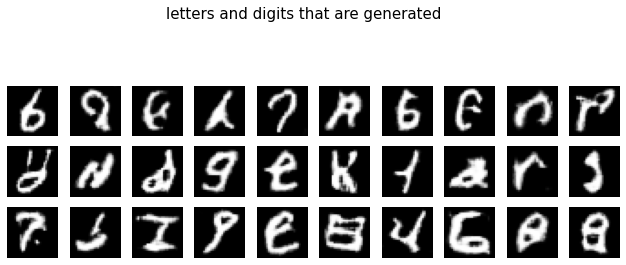

current epouch is:  31
discriminator loss currently is :  0.60151207447052
generator loss currently is:  1.0442473888397217
--------------------------------------------------------------------------------
current epouch is:  32
discriminator loss currently is :  0.6083288788795471
generator loss currently is:  1.2732717990875244
--------------------------------------------------------------------------------
current epouch is:  33
discriminator loss currently is :  0.6095584630966187
generator loss currently is:  0.9031352996826172
--------------------------------------------------------------------------------
current epouch is:  34
discriminator loss currently is :  0.6902945637702942
generator loss currently is:  0.39960089325904846
--------------------------------------------------------------------------------
current epouch is:  35
discriminator loss currently is :  0.5968713760375977
generator loss currently is:  1.290895700454712
------------------------------------------------

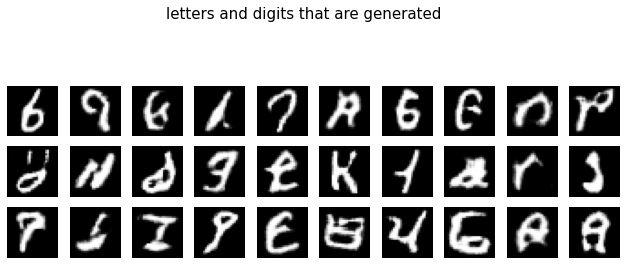

current epouch is:  36
discriminator loss currently is :  0.587769627571106
generator loss currently is:  1.1066185235977173
--------------------------------------------------------------------------------
current epouch is:  37
discriminator loss currently is :  0.601125955581665
generator loss currently is:  0.9140189290046692
--------------------------------------------------------------------------------
current epouch is:  38
discriminator loss currently is :  0.605355978012085
generator loss currently is:  1.1748533248901367
--------------------------------------------------------------------------------
current epouch is:  39
discriminator loss currently is :  0.6210165619850159
generator loss currently is:  1.4354264736175537
--------------------------------------------------------------------------------
current epouch is:  40
discriminator loss currently is :  0.5823555588722229
generator loss currently is:  1.084975004196167
--------------------------------------------------

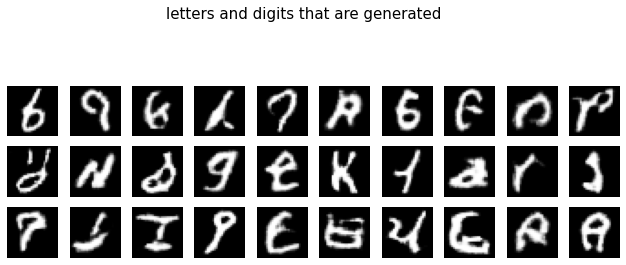

current epouch is:  41
discriminator loss currently is :  0.6191549897193909
generator loss currently is:  0.7533936500549316
--------------------------------------------------------------------------------
current epouch is:  42
discriminator loss currently is :  0.6011657118797302
generator loss currently is:  0.855012059211731
--------------------------------------------------------------------------------
current epouch is:  43
discriminator loss currently is :  0.6185529232025146
generator loss currently is:  1.390481948852539
--------------------------------------------------------------------------------
current epouch is:  44
discriminator loss currently is :  0.576290488243103
generator loss currently is:  1.3760461807250977
--------------------------------------------------------------------------------
current epouch is:  45
discriminator loss currently is :  0.5752077102661133
generator loss currently is:  1.1647166013717651
-------------------------------------------------

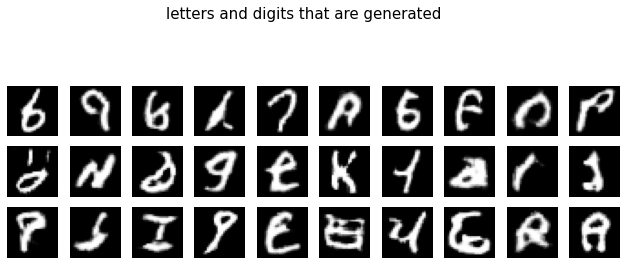

current epouch is:  46
discriminator loss currently is :  0.5627906322479248
generator loss currently is:  1.066817283630371
--------------------------------------------------------------------------------
current epouch is:  47
discriminator loss currently is :  0.5821018218994141
generator loss currently is:  0.8790993094444275
--------------------------------------------------------------------------------
current epouch is:  48
discriminator loss currently is :  0.5793509483337402
generator loss currently is:  1.103676438331604
--------------------------------------------------------------------------------
current epouch is:  49
discriminator loss currently is :  0.566051721572876
generator loss currently is:  1.0820132493972778
--------------------------------------------------------------------------------
current epouch is:  50
discriminator loss currently is :  0.5781033635139465
generator loss currently is:  1.2487396001815796
-------------------------------------------------

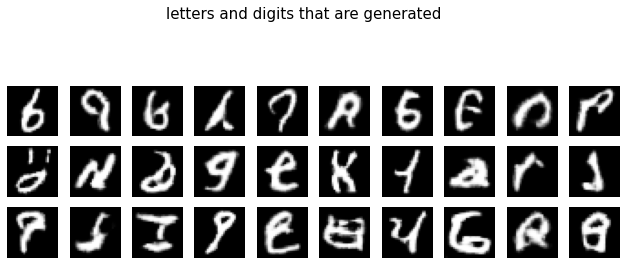

In [25]:
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        inputgenerator = np.random.normal(0, 1, size=(batch_size, ND))
        fakedataG = G.predict(inputgenerator)
        realdataG = trainingx[np.random.randint(0, trainingx.shape[0], size=batch_size)]
        realdataG = realdataG.reshape((batch_size, 28, 28, 1))
        inputdiscriminator= np.concatenate((realdataG , fakedataG))
        labeldiscriminator = np.zeros(2*batch_size)
        labeldiscriminator[:batch_size] = 0.9
        labeldiscriminator[batch_size:] = 0.1
        lossdiscriminator= D.train_on_batch(inputdiscriminator, labeldiscriminator)
        labelgenerator= np.ones(batch_size)
        lossgenerator = DCGAN.train_on_batch(inputgenerator, labelgenerator)

    print("current epouch is: ", epoch)
    print("discriminator loss currently is : ", lossdiscriminator)
    print("generator loss currently is: ", lossgenerator)
    print("-"*80)
    
    if epoch % 5 == 0:
        show_results("letters and digits that are generated", epoch)